# Analysis of PIRLS 2023 data on fourth graders, comparison between native and foreign born children

## About PIRLS

It is conduced every five years

[PIRLS](https://pirls2021.org/data/). This is where I was able to download all the SPSS files which are separated by country code and survey type.

SOURCE: IEA’s Progress in International Reading Literacy Study – PIRLS 2021 Copyright © 2023 International Association for the Evaluation of Educational Achievement (IEA). Publisher: TIMSS & PIRLS International Study Center, Lynch School of Education and Human Development, Boston College.

I have already cleaned and filtered the data in another notebook. To view this process, please <a href="https://nbviewer.org/github/SophieESpencer/Comparison/blob/main/For%20inclusion/Analysis.ipynb">click here</a>.

## Importing the Data and relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandataiqr16125.xlsx', index_col=0)

## Organising and Understanding Columns

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
feelings_in_school_columns = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
experiences_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

As we can see above the columns may be divided into demographic information columns which have mainly been taken from the Home Context Survey data which were answered by parents; Columns relating to children's feelings in school which are self-reported; Experience in school columns which relate to the frequency of negative experience in school, which again are self-reported; and lastly assessment score columns which are the results of the test. 

### Feelings in School Columns

What do you think about your school? Tell how much you agree with
these statements. 


A: I like being in school\
B: I feel safe when I am at school\
C: I feel like I belong at this school\
D: Teachers at my school are fair to me\
E: I am proud to go to this school\
F: I have friends at this school\

1 = Agree a lot\
2 = Agree a little\
3 = Disagree a little\
4 = Disagree a lot

### Experience in School Columns

During this year, how often have other students from your school done any of the following things to you, including through texting or the internet?


A: Made fun of me or called me names\
B: Left me out of their games or activities\
C: Spread lies about me\
D: Stole something from me\
E: Damaged something of mine on purpose\
F: Hit or hurt me (e.g., shoving, hitting, kicking)\
G: Made me do things I didn’t want to do\
H: Sent me nasty or hurtful messages online\
I: Shared nasty or hurtful information about me online\ 
J: Threatened me


1 = At least once a week\
2 = Once or twice a month\
3 = A few times a year\
4 = Never

### Literacy Assessment Score Columns

In [4]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

# Literacy Test Scores

I will start by looking at how foreign and native born children fare in their literacy test, comparing by country.

## Initial Structuring

In [5]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

In [6]:
# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [7]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

In [8]:
df_literacy = df[identifier_columns+averages]

## Literacy Heat Map

The first thing I want to investigate is how literacy scores are affected across countries for foreign and native-born children. 

In [9]:
pivot_literacy = df_literacy.pivot_table(values=averages, index=identifier_columns, aggfunc='mean')

In [10]:
# Calculate the total average for each row
pivot_literacy['Mean'] = pivot_literacy[averages].mean(axis=1)

In [11]:
# Define a custom order for the 'ASBH02A' column
asbh02a_sorter = ['native_born','foreign_born']

In [12]:
def sort_pivot_table(pivot_table, mean_col, sorter_col, sorter_order):
    """
    Sorts a pivot table based on the mean of a specified column and a custom order for another column.

    Parameters:
    - pivot_table (pd.DataFrame): The pivot table to sort.
    - mean_col (str): Column to calculate the mean for sorting countries.
    - sorter_col (str): Column to apply the custom sorting order.
    - sorter_order (list): Custom order for the sorter_col.

    Returns:
    - pd.DataFrame: A sorted pivot table.
    """
    # Sort countries by the total average of mean_col
    country_averages = (
        pivot_table.groupby('Country')[mean_col]
        .mean()
        .sort_values(ascending=False)
        .index.tolist()
    )

    # Create a custom sorting order for the index
    sorted_index = (
        pivot_table.index.to_frame()
        .rename(columns={'Country': 'Country_', sorter_col: f'{sorter_col}_'})
        .assign(
            Country_=lambda df: pd.Categorical(df['Country_'], categories=country_averages, ordered=True),
            **{f'{sorter_col}_': lambda df: pd.Categorical(df[f'{sorter_col}_'], categories=sorter_order, ordered=True)}
        )
        .sort_values(by=['Country_', f'{sorter_col}_'])
        .index
    )

    # Apply the sorted index to the pivot table
    return pivot_table.loc[sorted_index]


In [13]:
sorted_pivot_literacy = sort_pivot_table(pivot_literacy, 'Mean', 'ASBH02A', asbh02a_sorter)

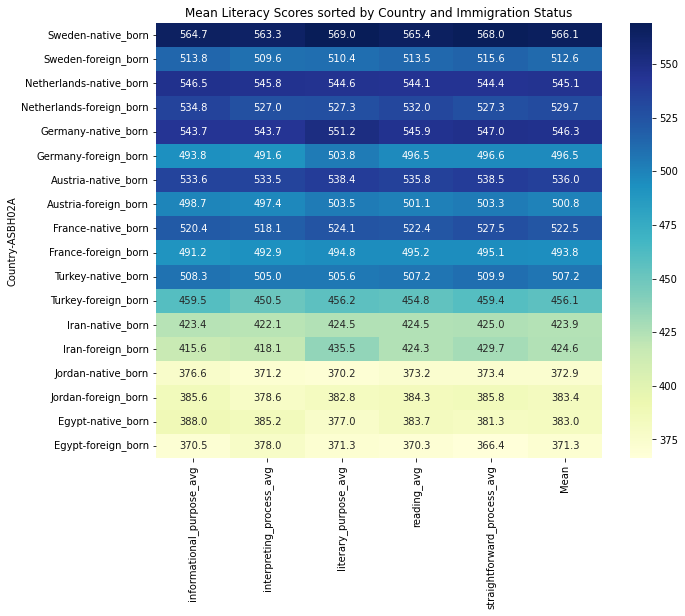

In [14]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_literacy, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Mean Literacy Scores sorted by Country and Immigration Status')
plt.show()

I ordered the heatmap by each country's mean score with the native-born children on top and foreign-born below. From this visualisation we an see that:

- native born children in Sweden have the highest average score. 
- Foreign born children in Egypt have the lowest average score, although this is only one mark lower that native-born Jordanians - palestine?
- Native born children outperform their foreign born peers in every country apart from Iran and Jordan. 
- Iran, Jordan and Egypt have the lowest scores overall at the smallest disparities between native and foreign born children.
- the disparity is above .. points for the otehr countries. 
- Scores seem to be slightly higher for literacy- purpose questions. 


## Do the diff thing for this heatmap - split into native and foreign. 

## Literacy Average Distribution

Now I want to see with a heatmap how being born in the respective country affects the distribution of average literacy scores across different countries. To ensure readability of this visualisation I will examine only the mean assessment score.

In [15]:
# Create a 'literacyavg' column
df["literacyavg"] = df[averages].mean(axis=1)

In [16]:
# Divide the column into ten bins for readability
df['literacyavg_binned'] = pd.cut(df['literacyavg'], bins=10)

In [17]:
# Create a contingency table
contingency_literacy = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['literacyavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='literacyavg_binned',
        value_name='count'
    )
)

Now I will create a set of functions that can be used across our different areas of exxamination (literacy scores, feelings in school and experiences in school) that will:
- divide the data into native and foreign born students
- create separate pivot tables for these two new datasets
- generate a pivot table with percentage values
- format the data for plotting
- plot a heatmap representing the data 

In [18]:
def filter_and_prepare_data(data, filter_column, filter_value, drop_column=None):
    """
    Filters the data based on a column value and optionally drops a column.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, the column to filter on.
    - filter_value: str, the value to filter by.
    - drop_column: str, optional, a column to drop after filtering.
    
    Returns:
    - pd.DataFrame, the filtered and optionally cleaned data.
    """
    filtered_data = data[data[filter_column] == filter_value]
    if drop_column and drop_column in filtered_data.columns:
        filtered_data = filtered_data.drop(drop_column, axis=1)
    return filtered_data

In [19]:
def create_pivot_table(data, index_col, column_col, value_col):
    """
    Creates a pivot table from the filtered data.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    
    Returns:
    - pd.DataFrame, the pivot table.
    """
    return data.pivot(index=index_col, columns=column_col, values=value_col)

In [20]:
def normalize_to_percentages(pivot_table):
    """
    Normalizes pivot table values to percentages.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table with a "total" column.
    
    Returns:
    - pd.DataFrame, the pivot table normalized to percentages.
    """
    pivot_table["total"] = pivot_table.sum(axis=1)
    total_column = pivot_table["total"]
    normalized_table = pivot_table.div(total_column, axis=0) * 100
    return normalized_table.drop("total", axis=1)

In [21]:
def melt_and_format_data(pivot_table, id_col, melt_col, value_name):
    """
    Converts a pivot table to a melted format and formats categorical bins.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table.
    - id_col: str, column to use as the identifier in the melted table.
    - melt_col: str, the column to melt (e.g., a column from the pivot table).
    - value_name: str, name for the values in the melted table.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the melted and formatted data.
    """
    melted = pivot_table.reset_index().melt(id_vars=id_col, var_name=melt_col, value_name=value_name)
    return melted


In [22]:
def generate_heatmap(data, filter_column, filter_value, index_col, column_col, value_col):
    """
    Generates a heatmap from the data based on filtering, pivoting, and normalizing steps.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, column to filter on.
    - filter_value: str, value to filter by.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the final heatmap as a pivot table.
    """
    filtered_data = filter_and_prepare_data(data, filter_column, filter_value, drop_column=filter_column)
    pivot_table = create_pivot_table(filtered_data, index_col=index_col, column_col=column_col, value_col=value_col)
    normalized_table = normalize_to_percentages(pivot_table)
    melted_data = melt_and_format_data(
        normalized_table, id_col=index_col, melt_col=column_col, value_name="percentage"
    )
    heatmap = melted_data.pivot(index=column_col, columns=index_col, values="percentage")
    return heatmap


Using the functions defined above I will now plot a figure with two heatmaps side by side representing the distribution of literacy assessment scores for native born and foreign born children respectively. 

In [23]:
heatmap_literacy_native_born = generate_heatmap(
    data=contingency_literacy,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='literacyavg_binned',
    value_col='count',
)

heatmap_literacy_foreign_born = generate_heatmap(
    data=contingency_literacy,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='literacyavg_binned',
    value_col='count',
)

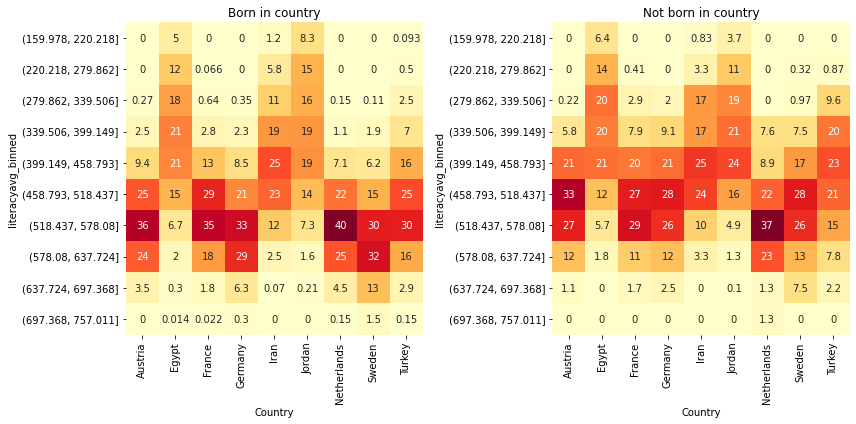

In [24]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_literacy_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_literacy_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

In order to better understand the difference between the two heat maps above, I will plot a heatmap showing the difference below.

<AxesSubplot:xlabel='Country', ylabel='literacyavg_binned'>

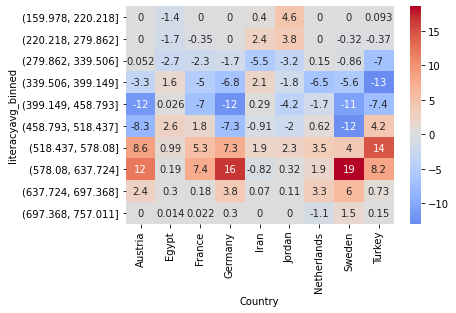

In [25]:
diff_data_literacy = heatmap_literacy_native_born - heatmap_literacy_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data_literacy, cmap="coolwarm", annot = True, center=0)

The above heatmap shows in red where native born countries hold a larger percentage of values compared to their foreign-born peers. For example, in Germany, there is a difference of 16% in the number of children achieving an average score between 578.08 and 637.734 -one of the higher scoring brackets.\
Conversely, there are 7% less native-born students achieving a lower score between 279.862,and 339.506 than foreign born students in Turkey.\
Interestingly, in Jordan and Iran - countries that are host many refugees with the same native language as the host country -there is less pronounced disparity between the scores received by foreign and native-born children. Indeed, in Iran and Turkey the proportion of native born children achieving lower literacy score brackets is higher, though the differences are relatively small.  

## Literacy Minimum Age of Arrival

In [26]:
pivot_minage_literacy = df.pivot_table(values='literacyavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [27]:
mean_scores_literacy = (
        pivot_minage_literacy.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

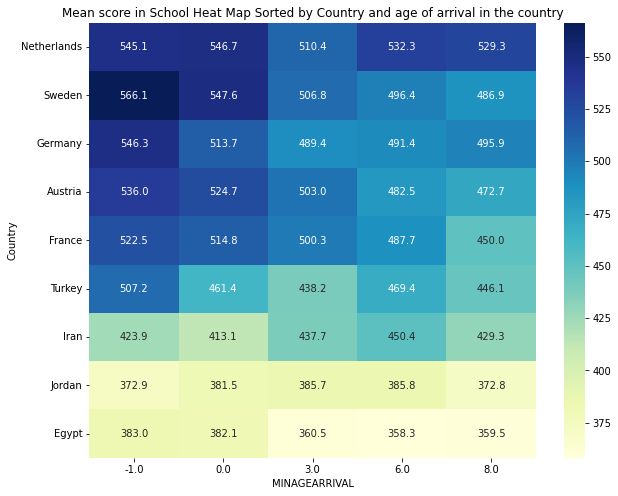

In [28]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_literacy, annot=True,fmt=".1f", cmap='YlGnBu')
plt.title('Mean Literacy Score sorted by Country and Age of Arrival in said Country')
plt.show()

We would expect the older you arrive, the more difficult it would be to assimilate as the less likely you are to speak the language and your parents to speak the language. 

However, interestingly, children arriving at later ages in the Netherlands, appear to do better than foreign-born children arriving between the ages of 3 and 6. 

The Netherlands is outperforming Sweden in terms of assessment scores for foreign- born children. In fact,even those arriving after the age of 8 in the Netherlands are performing better than native born children in France, Turkey, Iran, Jordan and Egypt. And foreign-born children arriving under the age of 3 in the Netherlands are even out-performing their native-born peers by a small amount. 

The biggest difference in score is Sweden?


Now I will perform the same analyses and visualisations to assess children's feelings about school and their experiences within it.

# Feelings in School

## Feelings Heat Map

In [29]:
df_feelings = df[identifier_columns+feelings_in_school_columns]

In [30]:
pivot_feelings = df_feelings.pivot_table(values=feelings_in_school_columns, index=identifier_columns, aggfunc='mean')

In [31]:
# Calculate the total average for each row
pivot_feelings['MeanTotal'] = pivot_feelings[feelings_in_school_columns].mean(axis=1)

In [32]:
def sort_pivot_table(pivot_table, mean_col, sorter_col, sorter_order):
    """
    Sorts a pivot table based on the mean of a specified column and a custom order for another column.

    Parameters:
    - pivot_table (pd.DataFrame): The pivot table to sort.
    - mean_col (str): Column to calculate the mean for sorting countries.
    - sorter_col (str): Column to apply the custom sorting order.
    - sorter_order (list): Custom order for the sorter_col.

    Returns:
    - pd.DataFrame: A sorted pivot table.
    """
    # Sort countries by the total average of mean_col
    country_averages = (
        pivot_table.groupby('Country')[mean_col]
        .mean()
        .sort_values(ascending=True)
        .index.tolist()
    )

    # Create a custom sorting order for the index
    sorted_index = (
        pivot_table.index.to_frame()
        .rename(columns={'Country': 'Country_', sorter_col: f'{sorter_col}_'})
        .assign(
            Country_=lambda df: pd.Categorical(df['Country_'], categories=country_averages, ordered=True),
            **{f'{sorter_col}_': lambda df: pd.Categorical(df[f'{sorter_col}_'], categories=sorter_order, ordered=True)}
        )
        .sort_values(by=['Country_', f'{sorter_col}_'])
        .index
    )

    # Apply the sorted index to the pivot table
    return pivot_table.loc[sorted_index]


In [33]:
sorted_pivot_feelings = sort_pivot_table(pivot_feelings, 'MeanTotal', 'ASBH02A', asbh02a_sorter)

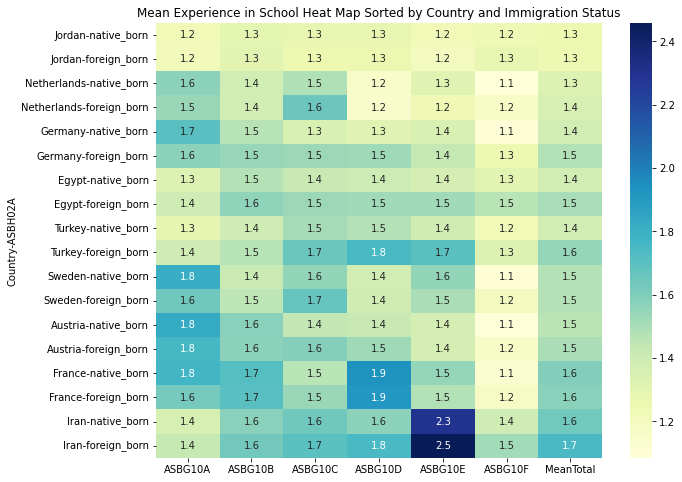

In [34]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_feelings, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

What do you think about your school? Tell how much you agree with
these statements. 


A: I like being in school\
B: I feel safe when I am at school\
C: I feel like I belong at this school\
D: Teachers at my school are fair to me\
E: I am proud to go to this school\
F: I have friends at this school\

1 = Agree a lot\
2 = Agree a little\
3 = Disagree a little\
4 = Disagree a lot

In the above the lowest numbers are at the top as this represents the best score. (agreeing a lot to liking being in schoo and feeling safe). \

- Students in Jordan are the happiest. 
- Students in Iran are the happiest. 

## Feelings Average Distribution

In [35]:
df['feelingsavg'] = df[feelings_in_school_columns].mean(axis=1)

In [36]:
df['feelingsavg_binned'] = pd.cut(df['feelingsavg'], bins=10)

In [37]:
# Create a contingency table
contingency_feelings = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['feelingsavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='feelingsavg_binned',
        value_name='count'
    )
)


In [38]:
heatmap_feelings_native_born = generate_heatmap(
    data=contingency_feelings,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='feelingsavg_binned',
    value_col='count',
)

heatmap_feelings_foreign_born = generate_heatmap(
    data=contingency_feelings,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='feelingsavg_binned',
    value_col='count',
)

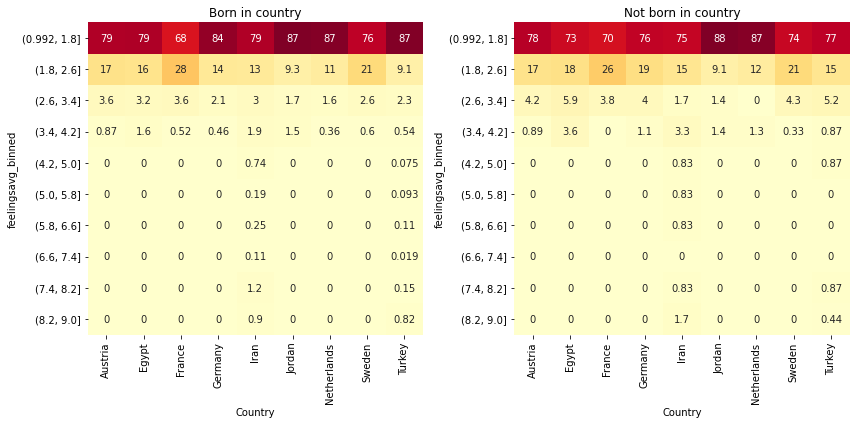

In [39]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_feelings_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_feelings_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Country', ylabel='feelingsavg_binned'>

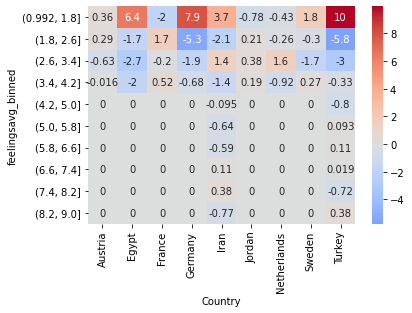

In [40]:
diff_data_feelings = heatmap_feelings_native_born - heatmap_feelings_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data_feelings, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [41]:
pivot_minage_feelings = df.pivot_table(values='feelingsavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [42]:
mean_scores_feelings = (
        pivot_minage_feelings.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

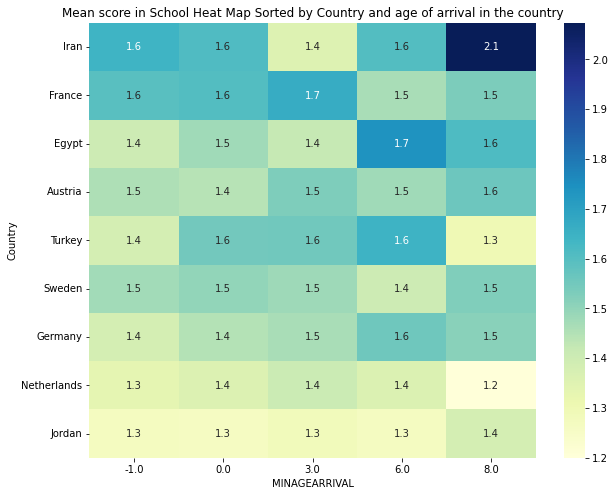

In [43]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_feelings, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

We would expect students in Iran to feature at the bottom of 

# Experience in School

## Experience in School Heatmap

In [44]:
df_experience = df[identifier_columns+experiences_in_school_columns]

In [45]:
pivot_experience = df_experience.pivot_table(values=experiences_in_school_columns, index=identifier_columns, aggfunc='mean')

In [46]:
# Calculate the total average for each row
pivot_experience['MeanTotal'] = pivot_experience[experiences_in_school_columns].mean(axis=1)

In [47]:
sorted_pivot_experience = sort_pivot_table(pivot_experience, 'MeanTotal', 'ASBH02A', asbh02a_sorter)

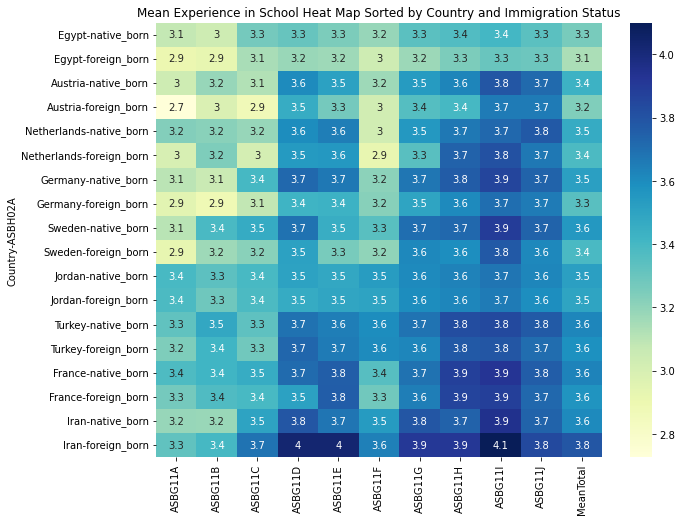

In [48]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_experience, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

### I need to rearrange this so that dark colours (good are at the top).

Native born kids are having less negativ experiences in school as we would expect. Egypt is the worst, followed by Austria. These statistics are quite heartening overall, with most cohorts answering never or a few times a year for negative experiences. 

During this year, how often have other students from your school done any of the following things to you, including through texting or the internet?


A: Made fun of me or called me names\
B: Left me out of their games or activities\
C: Spread lies about me\
D: Stole something from me\
E: Damaged something of mine on purpose\
F: Hit or hurt me (e.g., shoving, hitting, kicking)\
G: Made me do things I didn’t want to do\
H: Sent me nasty or hurtful messages online\
I: Shared nasty or hurtful information about me online\ 
J: Threatened me\


1 = At least once a week\
2 = Once or twice a month\
3 = A few times a year\
4 = Never

Surprisingly, Iranian students report the least negative experiences in school of all countries. 

## Experience Average Distribution

In [49]:
df['experienceavg'] = df[experiences_in_school_columns].mean(axis=1)

In [50]:
df['experienceavg_binned'] = pd.cut(df['experienceavg'], bins=10)

In [51]:
# Create a contingency table
contingency_experience = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['experienceavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='experienceavg_binned',
        value_name='count'
    )
)

In [52]:
heatmap_experience_native_born = generate_heatmap(
    data=contingency_experience,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

heatmap_experience_foreign_born = generate_heatmap(
    data=contingency_experience,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

#### Plotting

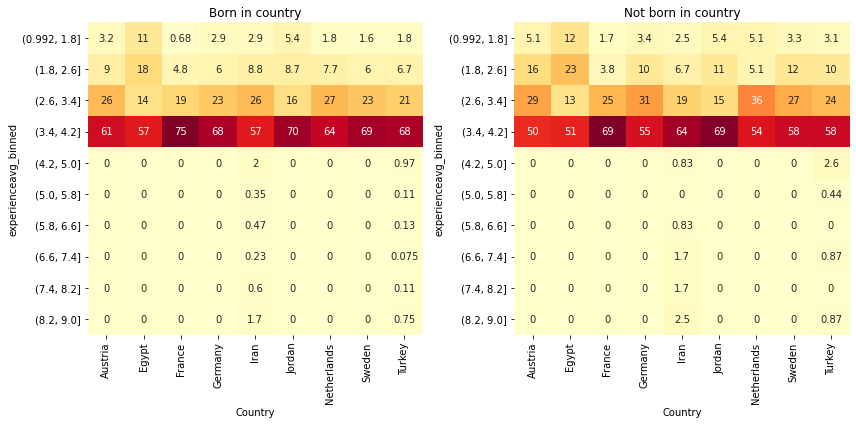

In [53]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_experience_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_experience_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

# I NEED TO REMOVE SOME 9s here obv!!!!!

<AxesSubplot:xlabel='Country', ylabel='experienceavg_binned'>

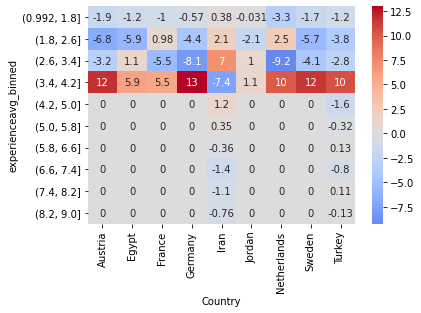

In [54]:
diff_data_experience = heatmap_experience_native_born - heatmap_experience_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data_experience, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [55]:
pivot_minage_experience = df.pivot_table(values='experienceavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [56]:
mean_scores_test = (
        pivot_minage_experience.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

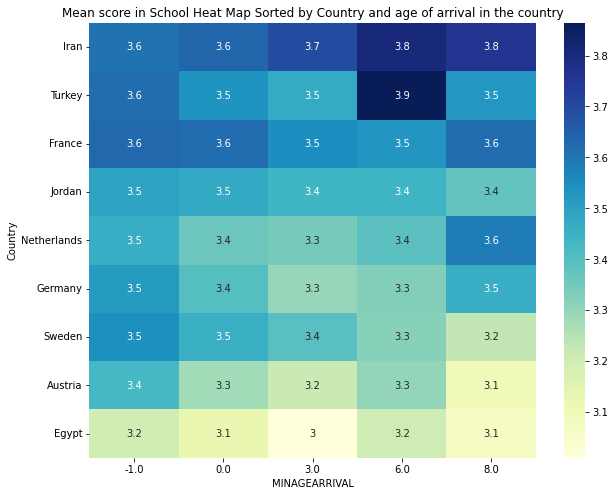

In [57]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_test, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

# Further Research

comparisons with bench marks - through line? 

Should compare reading scores with the benchmark and can also compare with previous years.

**Comparison with data from previous years**

How other demographic factors - parents level of education etc. affect scores.